# SoupX
# Jun Ying
# 30Mar2024

# Hu's data

In [3]:
library(Seurat)
library(SoupX)
library(DropletUtils)
library(ggplot2)
library(DoubletFinder)
library(knitr)
library(SeuratDisk)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

'SeuratObject' was built with package 'Matrix' 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Warning message:
"package 'MatrixGenerics' was built under R version 4.2.1"
Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, col

In [27]:
raw = Read10X_h5('../../rev_MI/Raw/SRR12774373/outs/raw_feature_bc_matrix.h5')

In [28]:
filtered = Read10X_h5('../../rev_MI/Raw/SRR12774373/outs/filtered_feature_bc_matrix.h5')

In [29]:
meta = read.csv('./Files//meta_Hu_hr12.csv',row.names = 1)

In [30]:
length(setdiff(rownames(meta),colnames(raw)))

[1] 0

In [31]:
raw = raw[intersect(rownames(filtered),rownames(raw)),]
filtered = raw[intersect(rownames(filtered),rownames(raw)),rownames(meta)]

In [32]:
ncol(filtered)

[1] 6414

In [20]:
raw.matrix = raw
filt.matrix = filtered

In [21]:
if(any(is.na(raw.matrix)) | any(is.na(filt.matrix))) {
  print("NA values found. Please clean your data.")
} else {
  # Proceed with your analysis
  sc <- SoupChannel(raw.matrix, filt.matrix, calcSoupProfile = FALSE)
}

In [22]:
# sc = SoupChannel(raw.matrix, filt.matrix)
sc = estimateSoup(sc)

In [23]:
sc = setClusters(sc, setNames(meta$CT_new2, rownames(meta)))

In [24]:
sc

Channel with 25432 genes and 6414 cells



In [25]:
length(intersect(rownames(meta),colnames(sc$toc)))

[1] 6414

In [28]:
sc = setDR(sc, meta[colnames(sc$toc), c("UMAP_1","UMAP_2")])

In [29]:
head(meta)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,⋯,DsRedEx,Title,Leiden_v1,CT_rough,CT_new,CT_new1,CT_new2,CT_lineage_v2,UMAP_1,UMAP_2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
AAACGGGTCACTGGGC-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,11,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,5.982265,8.728475
AAAGCAAAGTTGTCGT-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,17,Bl.ves.EC,Lymphatic cells,Lymphatic cells,Lymphatic cells,Lymphatic cells,17.293674,9.126356
AAATGCCGTATATCCG-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,11,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,6.242635,7.381366
AACCATGGTGCTAGCC-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,11,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,6.549344,8.813307
AACTCTTCAAGCCCAC-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,17,Bl.ves.EC,Lymphatic cells,Lymphatic cells,Lymphatic cells,Lymphatic cells,18.059954,9.514546
AACTCTTTCCGAACGC-1,GSM4817944,4-12m,adult,Injured,3,Zebrabow M,heart,GSE159032,All cells,WT,⋯,NA,NA,11,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,Bl.ves.EC,6.718676,7.038847


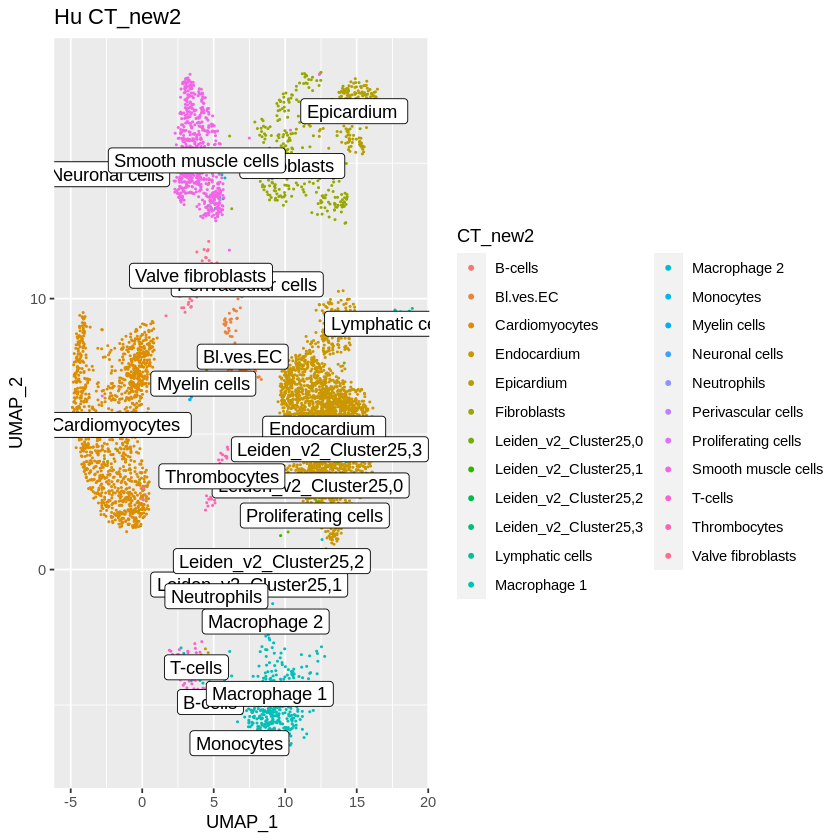

In [32]:
library(ggplot2)
dd = meta[colnames(sc$toc), ]
mids = aggregate(cbind(UMAP_1, UMAP_2) ~ CT_new2, data = dd, FUN = mean)
gg = ggplot(dd, aes(UMAP_1, UMAP_2)) + geom_point(aes(colour = CT_new2), size = 0.2) + 
    geom_label(data = mids, aes(label = CT_new2)) + ggtitle("Hu CT_new2") + 
    guides(colour = guide_legend(override.aes = list(size = 1)))
plot(gg)

In [33]:
table(sc$metaData$clusters)


              B-cells             Bl.ves.EC       Cardiomyocytes  
                   16                   139                  1219 
         Endocardium            Epicardium           Fibroblasts  
                 2885                   220                   359 
Leiden_v2_Cluster25,0 Leiden_v2_Cluster25,1 Leiden_v2_Cluster25,2 
                   26                     6                     1 
Leiden_v2_Cluster25,3       Lymphatic cells          Macrophage 1 
                   14                    32                   510 
         Macrophage 2             Monocytes          Myelin cells 
                   26                     2                    14 
       Neuronal cells           Neutrophils    Perivascular cells 
                    1                    24                    27 
  Proliferating cells   Smooth muscle cells               T-cells 
                    4                   674                   104 
         Thrombocytes     Valve fibroblasts 
                

In [34]:
saveRDS(sc,'./write/Hu_hr12_SoupX.rds')

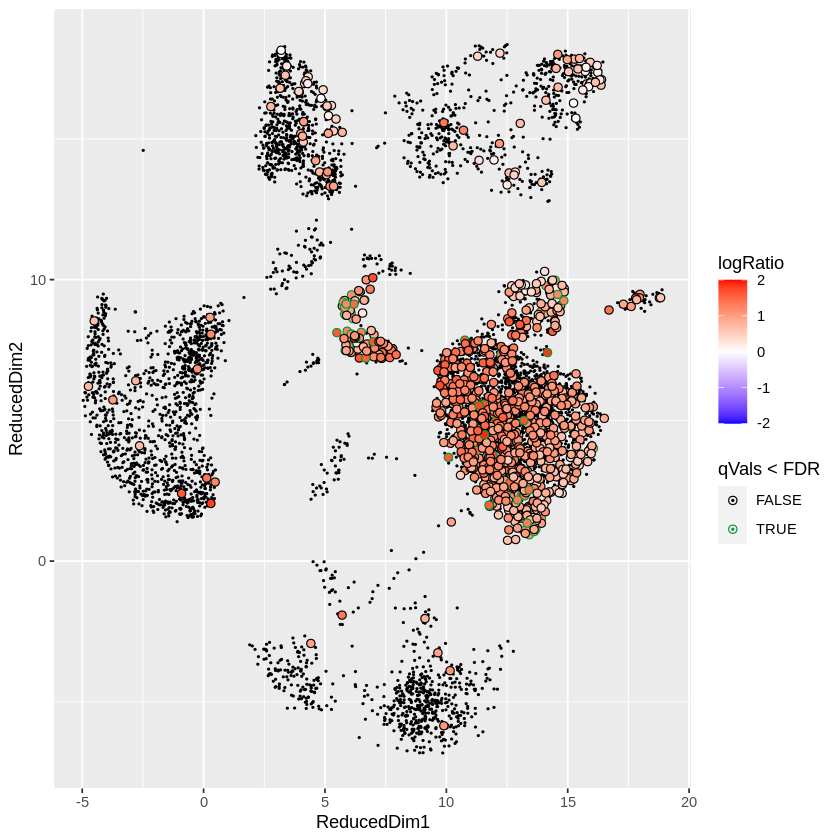

In [ ]:
gg = plotMarkerMap(sc, "kdrl")
plot(gg)

866 genes passed tf-idf cut-off and 370 soup quantile filter.  Taking the top 100.

Using 1565 independent estimates of rho.

Estimated global rho of 0.09



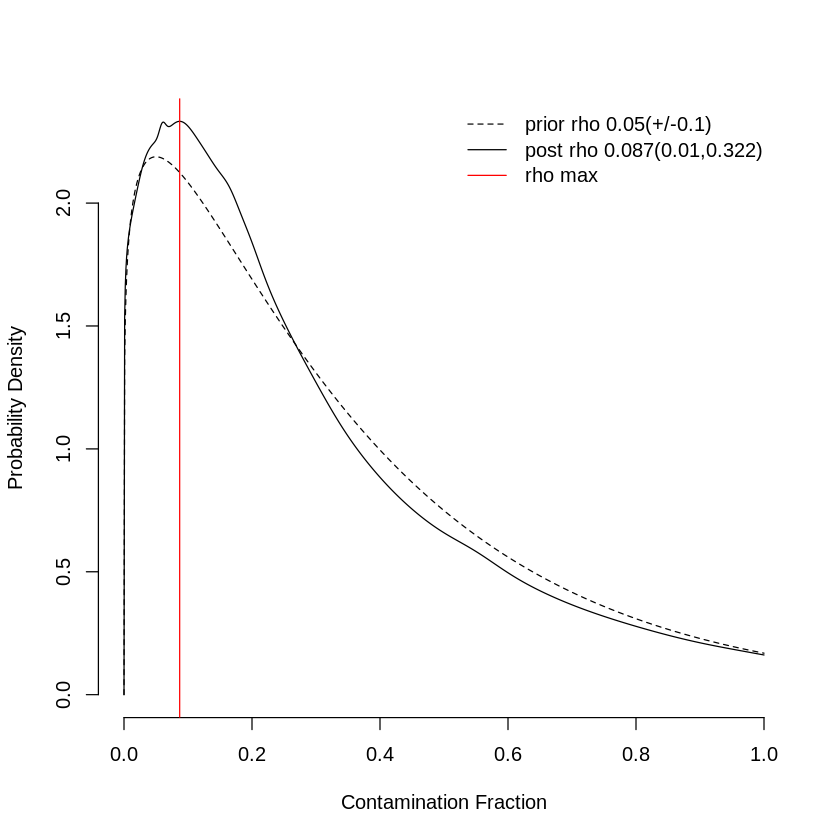

In [37]:
sc = autoEstCont(sc)

In [46]:
nonExpressedGeneList = list(GL = 'mpeg1.1')

# Manually define clusters

In [48]:

useToEst2 = estimateNonExpressingCells(sc, nonExpressedGeneList = nonExpressedGeneList, 
    clusters = sc$metaData$CT_new2)

In [49]:
table(useToEst2)

useToEst2
FALSE  TRUE 
  642  5772 

In [50]:
Seurat@meta.data$useToEst2 <- useToEst2

#VlnPlot(Seurat,features = 'kdrl',group.by = 'useToEst2')

In [51]:
sc = calculateContaminationFraction(sc, nonExpressedGeneList, useToEst = useToEst2)

Estimated global contamination fraction of 24.56%



In [52]:
# # Takes forever
# plotMarkerMap(sc, geneSet = nonExpressedGeneList, useToEst = useToEst2)

# head(sc$soupProfile[order(sc$soupProfile$est, decreasing = TRUE), ], n = 20)

# plotMarkerDistribution(sc)

In [53]:
umap = meta[,c('UMAP_1','UMAP_2')]

In [54]:
# head(umap)

In [55]:
Seurat[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(umap), key = "UMAP", assay = DefaultAssay(Seurat))

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP to UMAP_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_"


In [58]:
library(ggpubr)
library(patchwork)

gene1=nonExpressedGeneList$GL
gene2='useToEst2'
group='CT_new2'

plot1 <- FeaturePlot(Seurat, features = c(gene1), pt.size = 0.5)
plot2 <- FeaturePlot(Seurat, features = c(gene2), pt.size = 0.5)
plot3 <- DimPlot(Seurat,group.by = group)

# Arrange plots with ggarrange
# p <- ggarrange(plot1, plot2, plot3,
#           labels = c(gene1, gene2, gene3),
#           ncol = 3, nrow = 1, # Arrange in 1 row and 3 columns
#           common.legend = TRUE, legend = "right", legend.title = "Expression",
#           widths = c(2, 2, 2), heights = c(2), # Set plot sizes
#           title = "FeaturePlot Examples")
# show(p)

p <- plot1+plot2
ggsave(paste0("Hu_",gene1,".png"),p,height = 8,width = 5,units = "in")

In [5]:
out = adjustCounts(sc)

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
"'giveCsparse' is deprecated; setting repr="T" for you"
Expanding counts from 23 clusters to 6414 cells.



In [62]:
# cntSoggy = rowSums(sc$toc > 0)
# cntStrained = rowSums(out > 0)
# mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
# mostZeroed

crabp1a              clpxb             gpr37a             rlbp1b 
                 1                  1                  1                  1 
          tnni2a.4     CABZ01088346.1              fbln1              nptna 
                 1                  1                  1                  1 
ENSDARG00000101611            h2af1al 
                 1                  1

In [63]:
# tail(sort(rowSums(sc$toc > out)/rowSums(sc$toc > 0)), n = 20)

CABZ01032488.1             cdkn1d     CABZ01081909.1     CABZ01114105.1 
                 1                  1                  1                  1 
           taco1.1     CABZ01065076.1 ENSDARG00000104871     CABZ01001434.1 
                 1                  1                  1                  1 
    CABZ01080375.1     CABZ01113599.1     CABZ01033180.1     CABZ01035356.1 
                 1                  1                  1                  1 
ENSDARG00000103248     CABZ01102240.1     CABZ01051901.1     CABZ01090890.1 
                 1                  1                  1                  1 
              cdo1     CABZ01078055.1     CABZ01069162.1     CABZ01110379.1 
                 1                  1                  1                  1

In [10]:
sc <- readRDS('./write/Koth_SoupX_processed.rds')
out = adjustCounts(sc)

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
"'giveCsparse' is deprecated; setting repr="T" for you"
Expanding counts from 22 clusters to 12838 cells.



In [14]:
p <- plotChangeMap(sc, out, 'kdrl',pointSize = 2)

In [15]:
pdf("./figures/SoupCorrection_Koth_kdrl.pdf")
p
dev.off()

png 
  2

In [62]:
saveRDS(sc,'./write/Hu_hr12_SoupX_processed.rds')

In [347]:
srat = CreateSeuratObject(out)

In [348]:
srat

An object of class Seurat 
20450 features across 12838 samples within 1 assay 
Active assay: RNA (20450 features, 0 variable features)
 2 layers present: counts, data